# A4

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

## Misión 1

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1.0,5.0,NaN,5263,555.0,1.0,1.0,0,1.0
1,NaN,NaN,2015-07-31,6064,625.0,1.0,1.0,NaN,1.0
2,3.0,5.0,2015-07-31,8314,821.0,1.0,1.0,NaN,1.0
3,NaN,5.0,NaN,13995,1498.0,NaN,1.0,NaN,1.0
4,5.0,5.0,2015-07-31,4822,559.0,NaN,1.0,0,1.0


,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,189361.000000,201401.000000,234150.000000,195385.000000,177926.000000,177732.000000,177426.000000
mean,558.425642,3.999955,5901.379671,626.977936,0.832408,0.404806,0.141276
std,321.841666,2.000309,3832.485440,452.442907,0.373505,0.490856,0.348307
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,3925.000000,413.000000,1.000000,0.000000,0.000000
50%,559.000000,4.000000,5930.000000,608.000000,1.000000,0.000000,0.000000
75%,837.000000,6.000000,8008.000000,824.000000,1.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,5458.000000,1.000000,1.000000,1.000000


Tipo de valores unicos en feriados estatales
['0' 'a' 'b']


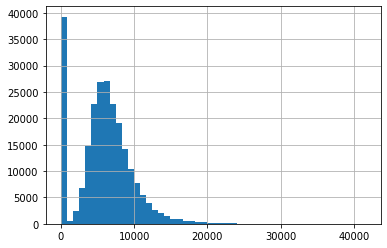

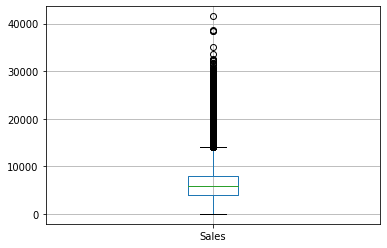

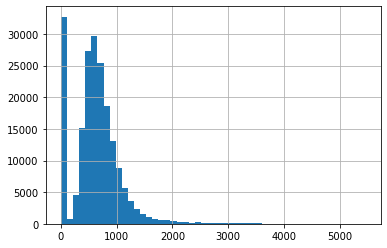

Cantidad de valores vacios:


Store            44789
DayOfWeek        32749
Date             82460
Sales                0
Customers        38765
Open             56224
Promo            56418
StateHoliday     80803
SchoolHoliday    56724
dtype: int64

In [14]:
df = pd.read_csv("data.csv")
display(df.head())
display(df.describe())

print("Tipo de valores unicos en feriados estatales")
print(df["StateHoliday"].dropna().unique())
df['Sales'].hist(bins=50)
plt.show()
df.boxplot(column='Sales')
plt.show()
df['Customers'].hist(bins=50)
plt.show()
print("Cantidad de valores vacios:")
display(df.apply(lambda x: sum(x.isnull()), axis=0))

De la información obtenida, destaca la gran cantidad de valores vacios que posee el dataset, la cantidad de valores extremos y la distribucion de ventas es comparable con la distribucion de clientes.

## Misión 2

In [15]:
# Completar nans, Store esta en orden con maximo de 1115, Fecha esta en orden desc, dayofweek con datetime.weekday(), open if sales != 0 -> = 1, customers, promo y ambos holidays se botaran las filas con nans por que implicaria influir significativamente en el dataset ya que la cantidad de valores a completar es muy grande.

df = df[(df["Customers"].notna() & df["Promo"].notna()
        & df["StateHoliday"].notna() & df["SchoolHoliday"].notna())]
        
df['NextStore'] = df['Store'].shift(-1)
df['NextNextStore'] = df['Store'].shift(-2)
df['NNNStore'] = df['Store'].shift(-3)
df['PrevStore'] = df['Store'].shift(1)
df['PrevPrevStore'] = df['Store'].shift(2)
df['PPPStore'] = df['Store'].shift(3)
df['Store'] = np.where(df['Store'] > 0, df['Store'], df['NextStore'])
df['Store'] = np.where(df['Store'] > 0, df['Store'], df['PrevStore'])
df['Store'] = np.where(df['Store'] > 0, df['Store'],
                       df['NextNextStore'])
df['Store'] = np.where(df['Store'] > 0, df['Store'],
                       df['PrevPrevStore'])
df['Store'] = np.where(df['Store'] > 0, df['Store'],
                       df['NNNStore'])
df['Store'] = np.where(df['Store'] > 0, df['Store'],
                       df['PPPStore'])
df = df.drop(columns="NextStore")
df = df.drop(columns="PrevStore")
df = df.drop(columns="NextNextStore")
df = df.drop(columns="PrevPrevStore")
df = df.drop(columns="NNNStore")
df = df.drop(columns="PPPStore")

df['PrevDate'] = df['Date'].shift(1)
df['NextDate'] = df['Date'].shift(-1)
df['PrevPrevDate'] = df['Date'].shift(2)
df['NextNextDate'] = df['Date'].shift(-2)
df['PPPDate'] = df['Date'].shift(3)
df['NNNDate'] = df['Date'].shift(-3)
df['PPPPDate'] = df['Date'].shift(4)
df['NNNNDate'] = df['Date'].shift(-4)
df['PPPPPDate'] = df['Date'].shift(5)
df['NNNNNDate'] = df['Date'].shift(-5)
df['PPPPPPDate'] = df['Date'].shift(6)
df['NNNNNNDate'] = df['Date'].shift(-6)

df['Date'] = np.where(df['Date'].notna(), df['Date'], df['PrevDate'])
df['Date'] = np.where(df['Date'].notna(), df['Date'], df['NextDate'])
df['Date'] = np.where(df['Date'].notna(), df['Date'], df['PrevPrevDate'])
df['Date'] = np.where(df['Date'].notna(), df['Date'], df['NextNextDate'])
df['Date'] = np.where(df['Date'].notna(), df['Date'], df['PPPDate'])
df['Date'] = np.where(df['Date'].notna(), df['Date'], df['NNNDate'])
df['Date'] = np.where(df['Date'].notna(), df['Date'], df['PPPPDate'])
df['Date'] = np.where(df['Date'].notna(), df['Date'], df['NNNNDate'])
df['Date'] = np.where(df['Date'].notna(), df['Date'], df['PPPPPDate'])
df['Date'] = np.where(df['Date'].notna(), df['Date'], df['NNNNNDate'])
df['Date'] = np.where(df['Date'].notna(), df['Date'], df['PPPPPPDate'])
df['Date'] = np.where(df['Date'].notna(), df['Date'], df['NNNNNNDate'])

df = df.drop(columns="NextDate")
df = df.drop(columns="PrevDate")
df = df.drop(columns="NextNextDate")
df = df.drop(columns="PrevPrevDate")
df = df.drop(columns="NNNDate")
df = df.drop(columns="PPPDate")
df = df.drop(columns="NNNNDate")
df = df.drop(columns="PPPPDate")
df = df.drop(columns="NNNNNDate")
df = df.drop(columns="PPPPPDate")
df = df.drop(columns="NNNNNNDate")
df = df.drop(columns="PPPPPPDate")

for i in range(len(df)):
    row = df.iloc[i]
    x = row["Date"].split("-")
    df.iloc[i, 1] = datetime.datetime(
        int(x[0]), int(x[1]), int(x[2])).weekday() + 1

df['Open'] = np.where(df['Open'].notna(), df['Open'],
                      df['Sales'].notna().astype(float))
display(df.apply(lambda x: sum(x.isnull()), axis=0))

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

En la limpieza y depruracion del dataset, se decidio eliminar las filas con nans en las columnas "Customers", "Promo", "StateHoliday" y "SchoolHoliday" ya que la cantidad de valores ha completar es grande y lograr completar la informacion sin influenciar el dataset es bastante complicado. Por otro lado, el resto de los datos se completo casi de forma deterministica, se tomaron algunas deciciones que pueden generar incongruencias despreciables como tomar el valor de la fila siguiente en vez de la anterior. Finalmente se ve que el dataset quedo sin valores nan.

## Misión 3

In [11]:
cat_vars = ['Store', "DayOfWeek", "Date",
            "Promo", "StateHoliday", "SchoolHoliday"]
label_encoder = LabelEncoder()
for i in cat_vars:
    df[i] = label_encoder.fit_transform(df[i])
# Dado que el dataset esta ordenado segun la fecha en forma descenciente, tenemos que el primer tercio del dataset es el terci omas reciente
test_set = df.iloc[:, :(df.shape[0]//3)]
training_set, test_set2 = train_test_split(df.copy(), test_size=0.3)
training_set, validation_set = train_test_split(
    training_set.copy(), test_size=0.1)

# scaler = StandardScaler()
features = ["Store", "DayOfWeek", "Date", "Customers",
            "Open", "Promo", "StateHoliday", "SchoolHoliday"]

# # training_set[features] = scaler.fit_transform(training_set[features])
# # validation_set[features] = scaler.transform(validation_set[features])
# # test_set[features] = scaler.transform(test_set[features])


def training_and_eval(model, training, eval, features, target):
    model.fit(training[features], training[target])
    predictions = model.predict(eval[features])
    mqe = metrics.mean_squared_error(predictions, eval[target])
    print(f"Error Cuadratico Medio: {mqe: .2}")


print("Test set tercio mas reciente")
target = 'Sales'
model = DecisionTreeClassifier()
training_and_eval(model, training_set, test_set, features, target)
model = LinearRegression()
training_and_eval(model, training_set, test_set, features, target)
model = KNeighborsClassifier()
training_and_eval(model, training_set, test_set, features, target)

print("Test set tercio aletorio")
model = DecisionTreeClassifier()
training_and_eval(model, training_set, test_set2, features, target)
model = LinearRegression()
training_and_eval(model, training_set, test_set2, features, target)
model = KNeighborsClassifier()
training_and_eval(model, training_set, test_set2, features, target)

Test set tercio mas reciente


MemoryError: could not allocate 726990848 bytes